In [1]:
# Dependencies to Display the image
import matplotlib.pyplot as plt
%matplotlib inline
# Dependenciees for all models
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import json

# Dependencies for VGG16
from tensorflow.keras.applications.vgg16 import (
        VGG16, 
        preprocess_input as preprocess_input_vgg16, 
        decode_predictions as decode_predictions_vgg16
)
# Dependencies for VGG19
from tensorflow.keras.applications.vgg19 import (
        VGG19, 
        preprocess_input as preprocess_input_vgg19, 
        decode_predictions as decode_predictions_vgg19
)
# Dependencies for RESNET50
from keras.applications.resnet50 import (
        ResNet50,
        preprocess_input as preprocess_input_resnet50, 
        decode_predictions as decode_predictions_resnet50
)

Using TensorFlow backend.


In [5]:
def predict_image(image_path):
    ## For all Models
    # Load Image
    img = image.load_img(image_path, target_size=(224, 224))
    # Display the image
    ax1 = plt.axes(frameon=False)
    plt.imshow(img)
    # Convert Image to an Array
    x = image.img_to_array(img)
    # Reshape the image according to the model input requierements
    x = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))

    # For Model VGG16
    model = VGG16()
    # Preprocess for the model VGG16
    x_vgg16 = preprocess_input_vgg16(x)
    # Prediction for the Model VGG16
    prediction_vgg16 = model.predict(x_vgg16)
    # Decoded Prediction for Model VGG16
    decoded_prediction_vgg16 = decode_predictions_vgg16(prediction_vgg16, top=3)
    # Print the model VGG16
    print("-----------------------")
    print("Prediction VGG16")
    print("-----------------------")
    print(decoded_prediction_vgg16[0][0][1], "{:.2%}".format(decoded_prediction_vgg16[0][0][2]))
    print(decoded_prediction_vgg16[0][1][1], "{:.2%}".format(decoded_prediction_vgg16[0][1][2]))
    print(decoded_prediction_vgg16[0][2][1], "{:.2%}".format(decoded_prediction_vgg16[0][2][2]))

    # For Model VGG19
    model = VGG19()
    # Preprocess for the model VGG19
    x_vgg19 = preprocess_input_vgg19(x)
    # Prediction for the Model VGG19
    prediction_vgg19 = model.predict(x_vgg19)
    # Decoded Prediction for Model VGG19
    decoded_prediction_vgg19 = decode_predictions_vgg19(prediction_vgg19, top=3)
    # Print the model VGG19
    print("-----------------------")
    print("Prediction VGG19")
    print("-----------------------")
    print(decoded_prediction_vgg19[0][0][1], "{:.2%}".format(decoded_prediction_vgg19[0][0][2]))
    print(decoded_prediction_vgg19[0][1][1], "{:.2%}".format(decoded_prediction_vgg19[0][1][2]))
    print(decoded_prediction_vgg19[0][2][1], "{:.2%}".format(decoded_prediction_vgg19[0][2][2]))

    # For Model RESNET50
    model = ResNet50()
    # Preprocess for the model RESNET50
    x_restnet50 = preprocess_input_resnet50(x)
    # Prediction for the Model RESNET50
    prediction_resnet50 = model.predict(x_restnet50)
    # Decoded Prediction for Model RESNET50
    decoded_prediction_resnet50 = decode_predictions_resnet50(prediction_resnet50, top=3)
    # Print the model RESNET50
    print("-----------------------")
    print("Prediction ResNet50")
    print("-----------------------")
    print(decoded_prediction_resnet50[0][0][1], "{:.2%}".format(decoded_prediction_resnet50[0][0][2]))
    print(decoded_prediction_resnet50[0][1][1], "{:.2%}".format(decoded_prediction_resnet50[0][1][2]))
    print(decoded_prediction_resnet50[0][2][1], "{:.2%}".format(decoded_prediction_resnet50[0][2][2]))
    print("-----------------------")
    json_answer = []

    model_vgg16_resp = []
    for i in range(0,3):
        json = {}
        json["Model"] = 'VGG16'
        json["no"] = i+1
        json["prediction"] = decoded_prediction_vgg16[0][i][1],
        json["probability"] = "{:.2%}".format(decoded_prediction_vgg16[0][i][2])
        model_vgg16_resp.append(json)
    json_answer.append(model_vgg16_resp)
    model_vgg19_resp = []
    for i in range(0,3):
        json = {}
        json["Model"] = 'VGG19'
        json["no"] = i+1
        json["prediction"] = decoded_prediction_vgg19[0][i][1],
        json["probability"] = "{:.2%}".format(decoded_prediction_vgg19[0][i][2])
        model_vgg16_resp.append(json)
    json_answer.append(model_vgg19_resp)
    model_resnet50 = []
    for i in range(0,3):
        json = {}
        json["Model"] = 'RESNET50'
        json["no"] = i+1
        json["prediction"] = decoded_prediction_resnet50[0][i][1],
        json["probability"] = "{:.2%}".format(decoded_prediction_resnet50[0][i][2])
        model_resnet50.append(json)
    json_answer.append(model_resnet50)

    return (json_answer)

-----------------------
Prediction VGG16
-----------------------
bookcase 66.46%
library 20.18%
entertainment_center 6.17%
-----------------------
Prediction VGG19
-----------------------
library 77.60%
bookcase 17.63%
bookshop 3.00%
-----------------------
Prediction ResNet50
-----------------------
crate 28.12%
umbrella 14.87%
prison 7.38%
-----------------------


[[{'Model': 'VGG16',
   'no': 1,
   'prediction': ('bookcase',),
   'probability': '66.46%'},
  {'Model': 'VGG16',
   'no': 2,
   'prediction': ('library',),
   'probability': '20.18%'},
  {'Model': 'VGG16',
   'no': 3,
   'prediction': ('entertainment_center',),
   'probability': '6.17%'},
  {'Model': 'VGG19',
   'no': 1,
   'prediction': ('library',),
   'probability': '77.60%'},
  {'Model': 'VGG19',
   'no': 2,
   'prediction': ('bookcase',),
   'probability': '17.63%'},
  {'Model': 'VGG19',
   'no': 3,
   'prediction': ('bookshop',),
   'probability': '3.00%'}],
 [],
 [{'Model': 'RESNET50',
   'no': 1,
   'prediction': ('crate',),
   'probability': '28.12%'},
  {'Model': 'RESNET50',
   'no': 2,
   'prediction': ('umbrella',),
   'probability': '14.87%'},
  {'Model': 'RESNET50',
   'no': 3,
   'prediction': ('prison',),
   'probability': '7.38%'}]]

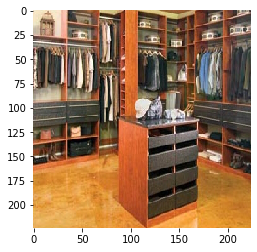

In [6]:
img_path = 'images/1.jpg'
predict_image(img_path)